# Topic modeling analysis 

In [1]:
import re
import string
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from flexibility import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Humans
humans = pd.read_csv('./data_processed/humans_data_processed.csv')
print('Humans:', len(humans))
objects = list(humans['prompt'].value_counts().head(4).index)
humans.head()

Humans: 10985


,prompt,response,originality,elaboration,dissimilarity,elaboration_SW,flexibility
0,brick,strength tester (punching),2.7,5,0.294817,5,0.00000
1,brick,art,2.1,1,0.330149,1,0.00000
2,brick,pencil holder,2.1,2,0.246490,2,1.50901
3,brick,writing utensil,2.1,2,0.232353,2,0.00000
4,brick,earrings,2.2,1,0.275411,1,0.00000


In [9]:
num_topics = 6
num_words = 10

dict_kw_coeff = run_LDA_on_humans_data(humans, num_topics, num_words, print_keywords = False, objects = objects)
pprint(dict_kw_coeff[:num_topics]) # print coeff for the first object

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Frequency of topics: [1414, 453, 1475, 1105, 904, 571]
Frequency of topics: [248, 727, 321, 565, 329, 342]
Frequency of topics: [470, 282, 386, 658, 499, 249]
Frequency of topics: [258, 286, 364, 278, 724, 244]
[{'coeff': 0.7612293144208038,
  'keywords': ['use',
               'make',
               'brick',
               'used',
               'paint',
               'could',
               'art',
               'like',
               'play',
               'shoe'],
  'object': 'brick',
  'topic': 0},
 {'coeff': 0.9235055724417427,
  'keywords': ['door',
               'keep',
               'holder',
               'prop',
               'tool',
               'rolling',
               'open',
               'wheel',
               'outside',
               'stopper'],

### Choose the best number of topics

In [27]:
# takes 9-10 min to run
cm_topic = pd.DataFrame(columns = ['object', 'num_topic', 'coherence_score'])
num_topics = 16
num_words = 10

for N in range(2, num_topics):
    lda_model_brick = create_lda_model(humans, 'brick', num_topics=N)
    lda_model_box = create_lda_model(humans, 'box', num_topics=N)
    lda_model_knife = create_lda_model(humans, 'knife', num_topics=N)
    lda_model_rope = create_lda_model(humans, 'rope', num_topics=N)

    lda_model_list = [lda_model_brick, lda_model_box, lda_model_knife, lda_model_rope]

    humans_topic,  df_kw_per_topic, perplexity, coherence_score = assign_topic_all(humans, lda_model_list, print_keywords = False, num_topics = N, num_words = num_words)
    for j, object in enumerate(objects):
        cm_topic.loc[len(cm_topic)] = [object, N, coherence_score[j]]
cm_topic.head()

Number of documents in corpus for object "brick": 4056


Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048
Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in c

,object,num_topic,coherence_score
0,brick,2,0.408381
1,box,2,0.500564
2,knife,2,0.623351
3,rope,2,0.550544
4,brick,3,0.520319


**Plot** coherence with respect to the number of topics

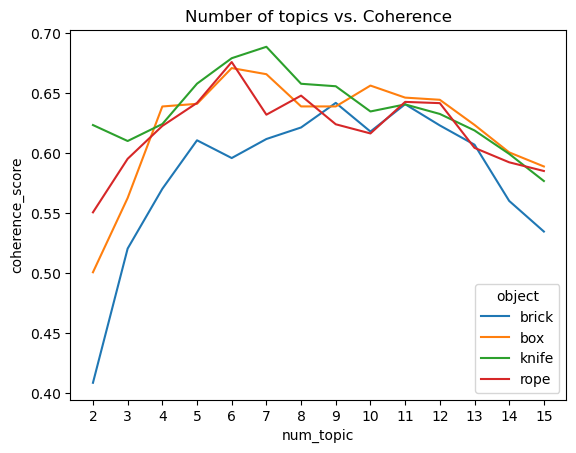

In [28]:
# plot
sns.lineplot(data = cm_topic, x = 'num_topic', y = 'coherence_score', hue = 'object')
# only integers on x axis 
plt.xticks(np.arange(2, num_topics, 1))
plt.title("Number of topics vs. Coherence")
plt.show()

We choose 6 topics for each object!

## Choose the best number of keywords per topic

Number of documents in corpus for object "brick": 4056
Number of documents in corpus for object "box": 2703
Number of documents in corpus for object "knife": 2178
Number of documents in corpus for object "rope": 2048


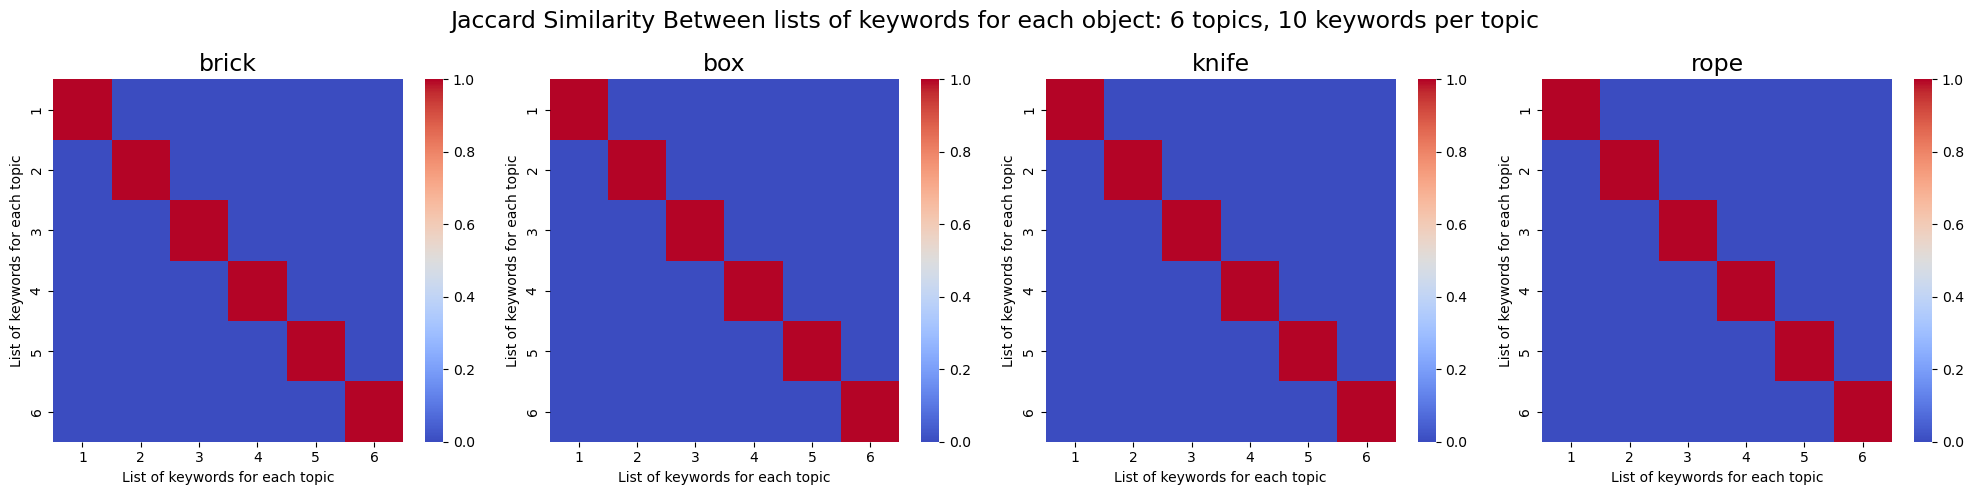

In [5]:
num_words = 10
num_topics = 6

humans_topic, df_kw_per_topic, coherence_score = check_overlap_keywords(humans, num_topics, num_words, objects)

In [6]:
df_kw_per_topic.head()

,object,topic,keywords,coherence
0,brick,0,"[use, make, brick, used, paint, could, art, li...",0.410069
1,brick,1,"[door, keep, holder, prop, tool, rolling, open...",0.643147
2,brick,2,"[build, someone, wall, garden, flower, weapon,...",0.695362
3,brick,3,"[hold, put, hole, thing, break, building, tabl...",0.531116
4,brick,4,"[something, weight, car, throw, paper, lift, p...",0.594109


topic
no value    3346
4           2160
3           1530
5           1406
2           1144
0            797
1            602
Name: count, dtype: int64


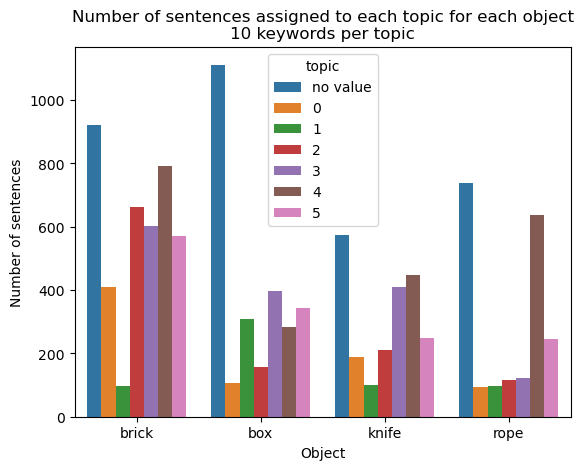

In [7]:
humans_topic['topic'] = humans_topic['topic'].fillna("no value")
print(humans_topic['topic'].value_counts())

sns.countplot(data = humans_topic, x = "prompt", hue = 'topic', hue_order = ['no value', 0,1,2,3,4,5])
plt.title(f"Number of sentences assigned to each topic for each object\n{num_words} keywords per topic")
plt.xlabel("Object")
plt.ylabel("Number of sentences")
plt.show()

### Evaluate topic modeling

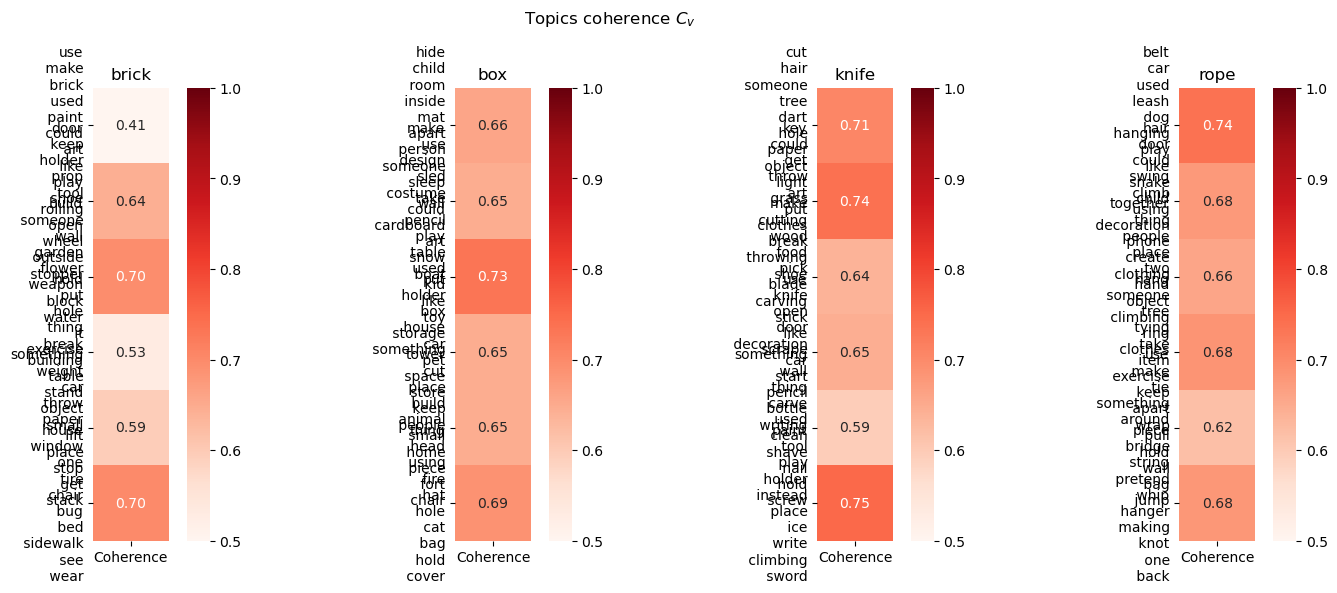

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
for idx, object in enumerate(objects):
    topics = df_kw_per_topic[df_kw_per_topic['object'] == object]['keywords'].tolist()
    coherence_per_topic = df_kw_per_topic[df_kw_per_topic['object'] == object]['coherence'].tolist()

    topics_str = [ '\n '.join(t) for t in topics ]
    data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
    data_topic_score = data_topic_score.set_index('Topic')

    sns.heatmap(data=data_topic_score, annot=True, square=True,
                cmap='Reds', fmt='.2f',
                linecolor='black', ax=axs[idx], vmin=0.5, vmax=1)
    axs[idx].tick_params(axis = 'y', rotation = 0)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].set_title(object)
plt.suptitle("Topics coherence $C_v$")
plt.tight_layout()
plt.show()

### Visualize topic modeling with pyLDAvis

In [ ]:
#visu_with_pyldavis(lda_model_brick, humans, object = 'brick')

# Comparison 

- Humans annotation vs. OCSAI vs. OCSTB for Humans
- OCSAI vs. OCSTB for LLMs

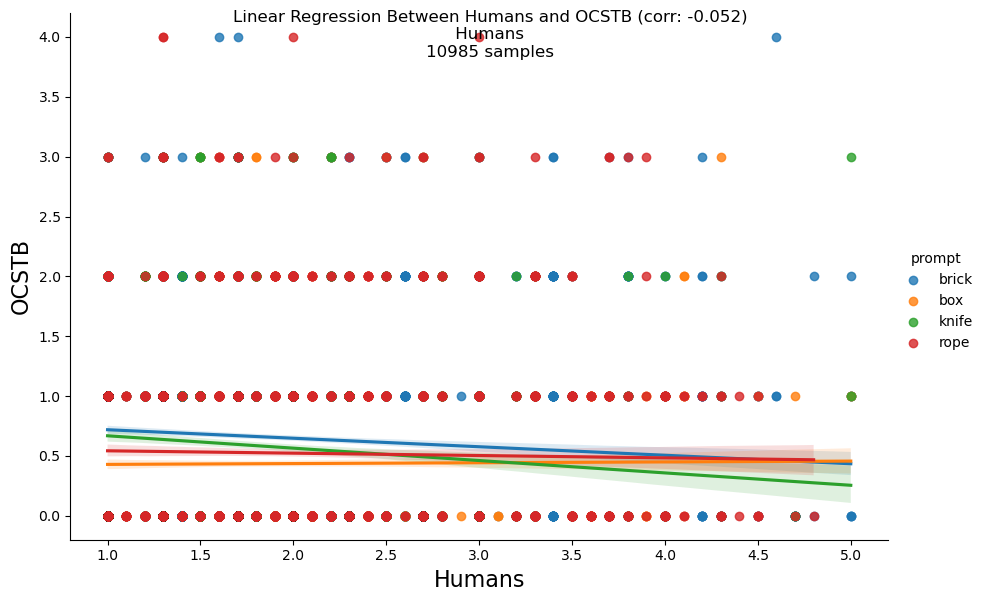

In [ ]:
# Compute correlation
correlation = df_topic_score['originality'].corr(df_topic_score['flexibility'])

# Plot linear regression line
#fig, axs = plt.subplots(1, 2, figsize = (15,6))
#sns.lmplot(data=df_topic_score, x='originality', y='originality_topic', col = 'prompt', height=6, aspect=1.5)
sns.lmplot(x='originality', y='flexibility', data=df_topic_score, hue = 'prompt', height=6, aspect=1.5)
#sns.lmplot(x='originality', y='originality_topic', data=df_topic_score, height=6, aspect=1.5)
plt.suptitle(f'Linear Regression Between Humans and OCSTB (corr: {correlation.round(3)})\n Humans \n{len(df_topic_score)} samples')
plt.xlabel('Humans', fontsize = 16)
plt.ylabel('OCSTB', fontsize = 16)
plt.show()

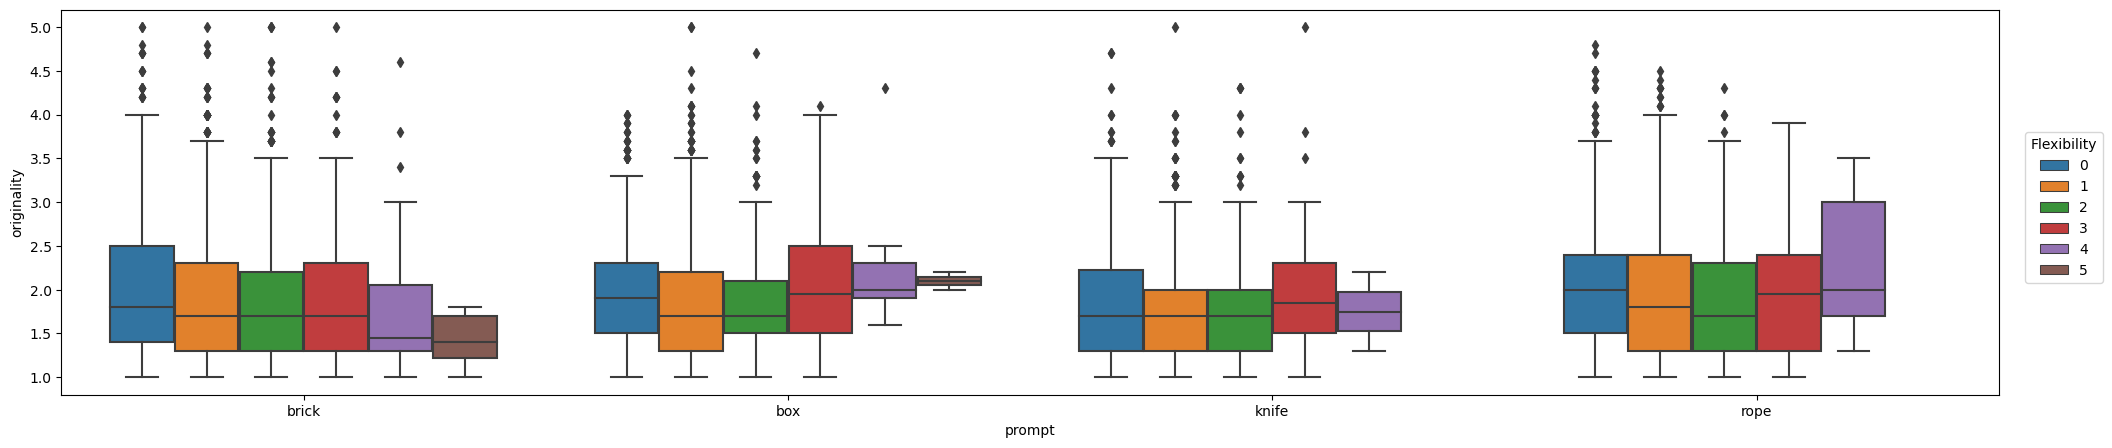

In [ ]:
# boxplots
plt.figure(figsize=(25, 5))
sns.boxplot(data=humans, x='prompt', y='originality', hue = 'flexibility', hue_order = np.arange(num_topics).tolist())
#plt.title("Originality per topic")
#plt.title(f"Originality per topic for Humans for {num_topics} topics, Perplexity: {np.array(perplexity).mean().round(3)}, Coherence score: {np.array(coherence_score).mean().round(3)}", fontsize = 16)

plt.legend(title = 'Flexibility', bbox_to_anchor=(1.01, 0.7), loc='upper left')
plt.show()

<Axes: xlabel='flexibility', ylabel='originality'>

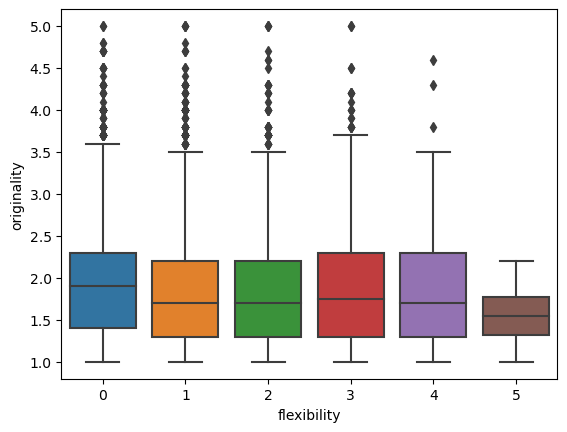

In [ ]:
sns.boxplot(data = humans, x = 'flexibility', y = 'originality')

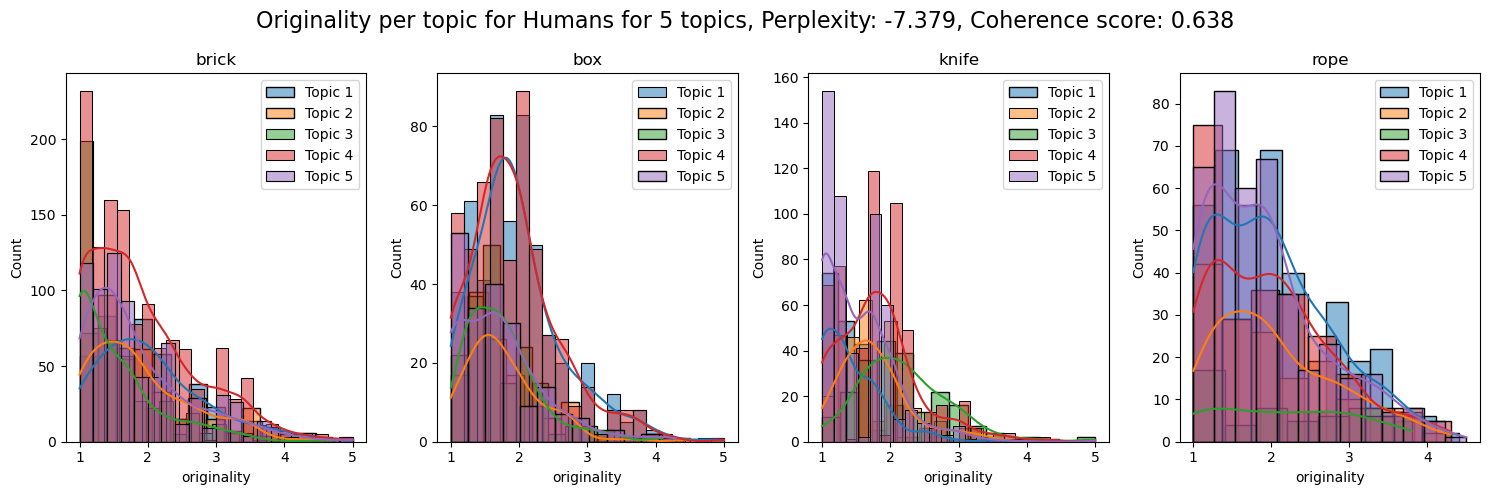

In [ ]:
#plot_originality_per_topic(humans, lda_model_list, 'Humans', False, num_topics)